# Descriptive Statistics with data and python

Vamos a hacer un ejercicio práctico con estadísticos descriptivos ahora para una serie real de datos reales de la FAO, en este caso:
- El dominio FAOSTAT Emissions Totals resume las emisiones de gases de efecto invernadero (GEI) generadas por los sistemas agroalimentarios y que se difunden en los dominios FAOSTAT Climate Change Emissions.
- Bajada de: https://www.fao.org/faostat/en/#data/GT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn-talk')
data1=pd.read_csv("co2-fossil-global_zip/archive/global.csv")
data2=pd.read_csv("FAOSTAT_data_en_6-20-2023.csv")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
data1

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [3]:
data2

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,170,Colombia,7234,Direct emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,0.3655,E,Estimated value,NaN
1,GT,Emissions totals,170,Colombia,7236,Indirect emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,0.0822,E,Estimated value,NaN
2,GT,Emissions totals,170,Colombia,7230,Emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,0.4477,E,Estimated value,NaN
3,GT,Emissions totals,170,Colombia,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,118.6450,E,Estimated value,NaN
4,GT,Emissions totals,170,Colombia,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,118.6450,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,GT,Emissions totals,170,Colombia,724313,Emissions (CO2eq) from N2O (AR5),6819,Other,2019,2019,3050,FAO TIER 1,kt,726.1000,E,Estimated value,NaN
5597,GT,Emissions totals,170,Colombia,723113,Emissions (CO2eq) (AR5),6819,Other,2019,2019,3050,FAO TIER 1,kt,726.1000,E,Estimated value,NaN
5598,GT,Emissions totals,170,Colombia,7230,Emissions (N2O),6819,Other,2020,2020,3050,FAO TIER 1,kt,2.8200,E,Estimated value,NaN
5599,GT,Emissions totals,170,Colombia,724313,Emissions (CO2eq) from N2O (AR5),6819,Other,2020,2020,3050,FAO TIER 1,kt,747.3000,E,Estimated value,NaN


In [4]:
data2["Item"].value_counts()

Item
Crop Residues                      300
Burning - Crop residues            300
Manure Management                  300
Manure left on Pasture             300
Manure applied to Soils            300
Synthetic Fertilizers              300
Food Household Consumption         217
IPPU                               217
Food Retail                        217
On-farm Electricity Use            186
Pesticides Manufacturing           186
Agrifood Systems Waste Disposal    186
On-farm energy use                 186
Food Transport                     186
Food Packaging                     186
Energy                             186
Waste                              186
Food Processing                    186
Rice Cultivation                   180
Enteric Fermentation               180
Savanna fires                      155
Forest fires                       155
Fires in humid tropical forests    155
Fires in organic soils             124
Fertilizers Manufacturing          124
Drained organic soil

In [5]:
data2.groupby(by=["Item","Element"])

In [6]:
data2.index=data2["Year"]
data2=data2.drop(columns="Year")
data1.index=data1["Year"]
data1=data1.drop(columns="Year")

data1

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
Year,,,,,,,
1751,3,0,0,3,0,0,NaN
1752,3,0,0,3,0,0,NaN
1753,3,0,0,3,0,0,NaN
1754,3,0,0,3,0,0,NaN
1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...
2006,8370,1525,3089,3339,356,61,1.27
2007,8566,1572,3081,3464,382,68,1.28
2008,8783,1631,3122,3571,388,71,1.30


<Figure size 300x200 with 0 Axes>

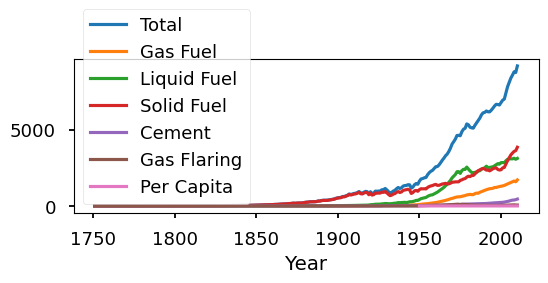

In [7]:
plt.figure(figsize=(3,2))
data1.plot(figsize=(6,2))
plt.show()

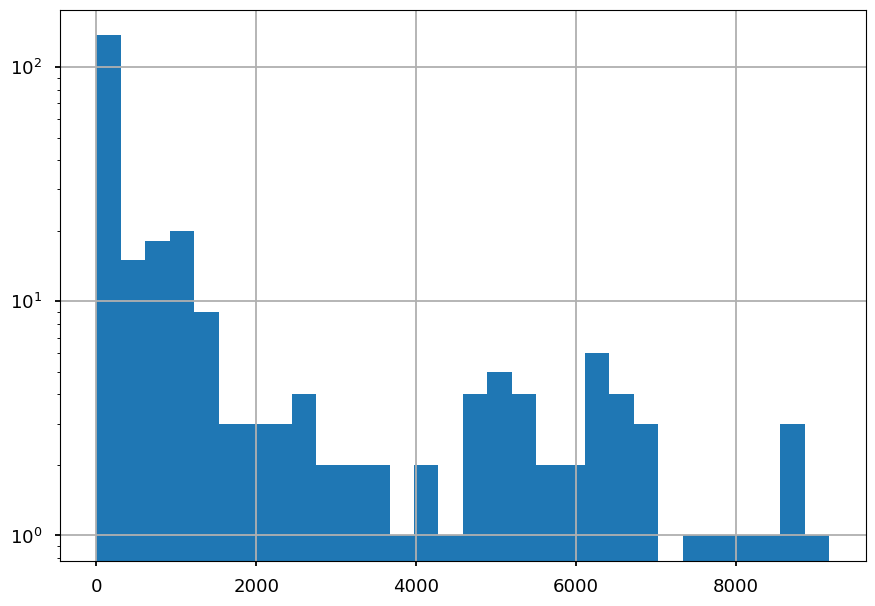

In [8]:
data1["Total"].hist(bins=30)
plt.yscale("log")

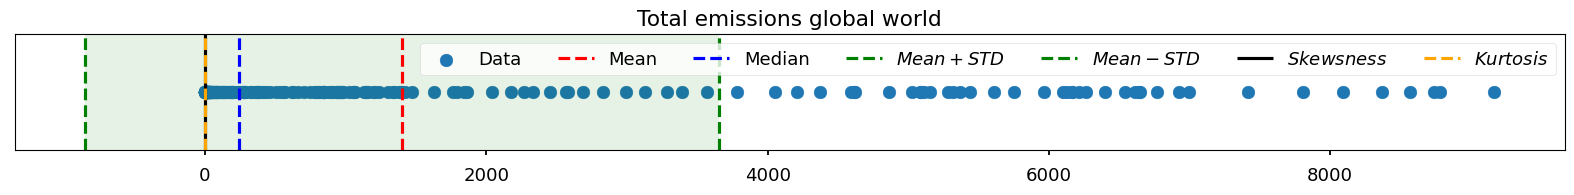

In [9]:
plt.figure(figsize=(20,1.5))
plt.scatter(data1["Total"], [1] * data1["Total"].shape[0],label="Data")
plt.ylim(0.5,1.5);plt.yticks(ticks=[], labels=[]);plt.grid()
plt.vlines(data1["Total"].mean(),0.5,1.5,linestyles="--",color="r",label="Mean")
plt.vlines(data1["Total"].median(),0.5,1.5,linestyles="--",color="b",label="Median")
plt.vlines(data1["Total"].mean()+data1["Total"].std(),0.5,1.5,linestyles="--",color="g",label="$Mean+STD$")
plt.vlines(data1["Total"].mean()-data1["Total"].std(),0.5,1.5,linestyles="--",color="g",label="$Mean-STD$")
plt.vlines(data1["Total"].skew(),0.5,1.5,linestyles="-",color="k",label="$Skewsness$")
plt.vlines(data1["Total"].kurt(),0.5,1.5,linestyles="--",color="orange",label="$Kurtosis$")
plt.axvspan(data1["Total"].mean()-data1["Total"].std(),data1["Total"].mean()+data1["Total"].std(), facecolor='g', alpha=0.1)
plt.title("Total emissions global world")
plt.grid()
plt.legend(ncol=8)
plt.show()

In [10]:
#Eliminando columnas que no nos hacen falta porque no dan información
data2=data2.drop(columns=["Domain Code","Domain","Area Code (M49)","Area","Element Code","Item Code",
                         "Source Code","Source","Unit","Flag Description","Note","Flag"])

In [11]:
data2=data2.drop(columns="Year Code")
data2


,Element,Item,Value
Year,,,
1961,Direct emissions (N2O),Crop Residues,0.3655
1961,Indirect emissions (N2O),Crop Residues,0.0822
1961,Emissions (N2O),Crop Residues,0.4477
1961,Emissions (CO2eq) from N2O (AR5),Crop Residues,118.6450
1961,Emissions (CO2eq) (AR5),Crop Residues,118.6450
...,...,...,...
2019,Emissions (CO2eq) from N2O (AR5),Other,726.1000
2019,Emissions (CO2eq) (AR5),Other,726.1000
2020,Emissions (N2O),Other,2.8200


In [12]:
#Identificando algunos elementos únicos
data2["Element"].value_counts()

Element
Emissions (CO2eq) (AR5)                 1193
Emissions (N2O)                          918
Emissions (CO2eq) from N2O (AR5)         918
Emissions (CH4)                          736
Emissions (CO2eq) from CH4 (AR5)         736
Emissions (CO2)                          527
Direct emissions (N2O)                   240
Indirect emissions (N2O)                 240
Emissions (CO2eq) from F-gases (AR5)      93
Name: count, dtype: int64

In [13]:
#Identificando un nuevo conjunti de datos que contiene solo la variable que se necesita
data2_co2=data2[data2["Element"]=="Emissions (CO2)"]
data2_ch4=data2[data2["Element"]=="Emissions (CH4)"]
data2_n2o=data2[data2["Element"]=="Emissions (N2O)"]

In [14]:
data2_co2

,Element,Item,Value
Year,,,
1990,Emissions (CO2),Drained organic soils (CO2),403.2156
1991,Emissions (CO2),Drained organic soils (CO2),403.2156
1992,Emissions (CO2),Drained organic soils (CO2),403.2156
1993,Emissions (CO2),Drained organic soils (CO2),403.2156
1994,Emissions (CO2),Drained organic soils (CO2),403.2156
...,...,...,...
2016,Emissions (CO2),Waste,17.4000
2017,Emissions (CO2),Waste,17.6000
2018,Emissions (CO2),Waste,17.8000


In [15]:
data2_ch4

,Element,Item,Value
Year,,,
1961,Emissions (CH4),Rice Cultivation,49.1271
1962,Emissions (CH4),Rice Cultivation,61.6524
1963,Emissions (CH4),Rice Cultivation,52.6288
1964,Emissions (CH4),Rice Cultivation,62.6780
1965,Emissions (CH4),Rice Cultivation,77.6482
...,...,...,...
2016,Emissions (CH4),Waste,825.0000
2017,Emissions (CH4),Waste,834.0000
2018,Emissions (CH4),Waste,845.0000


In [17]:
data2_co2["Item"].value_counts()

Item
Drained organic soils (CO2)        31
Food Processing                    31
IPPU                               31
Energy                             31
Food Transport                     31
Food Household Consumption         31
Food Retail                        31
Food Packaging                     31
On-farm Electricity Use            31
On-farm energy use                 31
Pesticides Manufacturing           31
Fertilizers Manufacturing          31
Agrifood Systems Waste Disposal    31
Fires in organic soils             31
Net Forest conversion              31
Forestland                         31
Waste                              31
Name: count, dtype: int64

In [21]:
#Sacando la variable: Drained organic soils (CO2), y otras
co2_drained_organic_soil=data2_co2[data2_co2["Item"]=="Drained organic soils (CO2)"]["Value"]
co2_food_procesing=data2_co2[data2_co2["Item"]=="Food Processing"]["Value"]
co2_food_transport=data2_co2[data2_co2["Item"]=="Food Transport"]["Value"]
co2_food_packaging=data2_co2[data2_co2["Item"]=="Food Packaging"]["Value"]
co2_waste=data2_co2[data2_co2["Item"]=="Waste"]["Value"]
co2_fires_organic_soils=data2_co2[data2_co2["Item"]=="Fires in organic soils"]["Value"]

In [31]:
#Unir todos los datos en un solo conjunto de datos
co2_influencer=pd.concat([co2_drained_organic_soil,co2_food_procesing,co2_food_transport,co2_food_packaging,
                       co2_waste,co2_fires_organic_soils],axis=1)

In [33]:
co2_influencer.columns=["drained_organic_soil","food_procesing","food_transport","food_packaging",
                       "waste","fires_organic_soils"]

In [34]:
co2_influencer

,drained_organic_soil,food_procesing,food_transport,food_packaging,waste,fires_organic_soils
Year,,,,,,
1990,403.2156,2354.4309,1716.8672,587.3712,10.2,0.0
1991,403.2156,2557.3965,1751.6113,691.0762,10.5,0.0
1992,403.2156,2777.3169,1922.9900,622.8738,10.8,0.0
1993,403.2156,2631.8225,2133.6238,662.3488,11.0,0.0
1994,403.2156,2615.4657,2168.0513,612.1110,11.3,0.0
1995,438.9085,2679.2136,2253.8776,705.5995,11.6,0.0
1996,438.9085,2647.6837,2296.0105,746.3678,11.8,0.0
1997,438.9085,2886.3234,2430.9859,787.6156,12.1,0.0
1998,449.1113,2218.0508,2396.8383,578.8465,12.3,0.0
